    sex  age   Time  Number_of_Warts  Type  Area  induration_diameter  \
0     1   22   2.25               14     3    51                   50   
1     1   15   3.00                2     3   900                   70   
2     1   16  10.50                2     1   100                   25   
3     1   27   4.50                9     3    80                   30   
4     1   20   8.00                6     1    45                    8   
5     1   15   5.00                3     3    84                    7   
6     1   35   9.75                2     2     8                    6   
7     2   28   7.50                4     1     9                    2   
8     2   19   6.00                2     1   225                    8   
9     2   32  12.00                6     3    35                    5   
10    2   33   6.25                2     1    30                    3   
11    2   17   5.75               12     3    25                    7   
12    2   15   1.75                1     2    49   

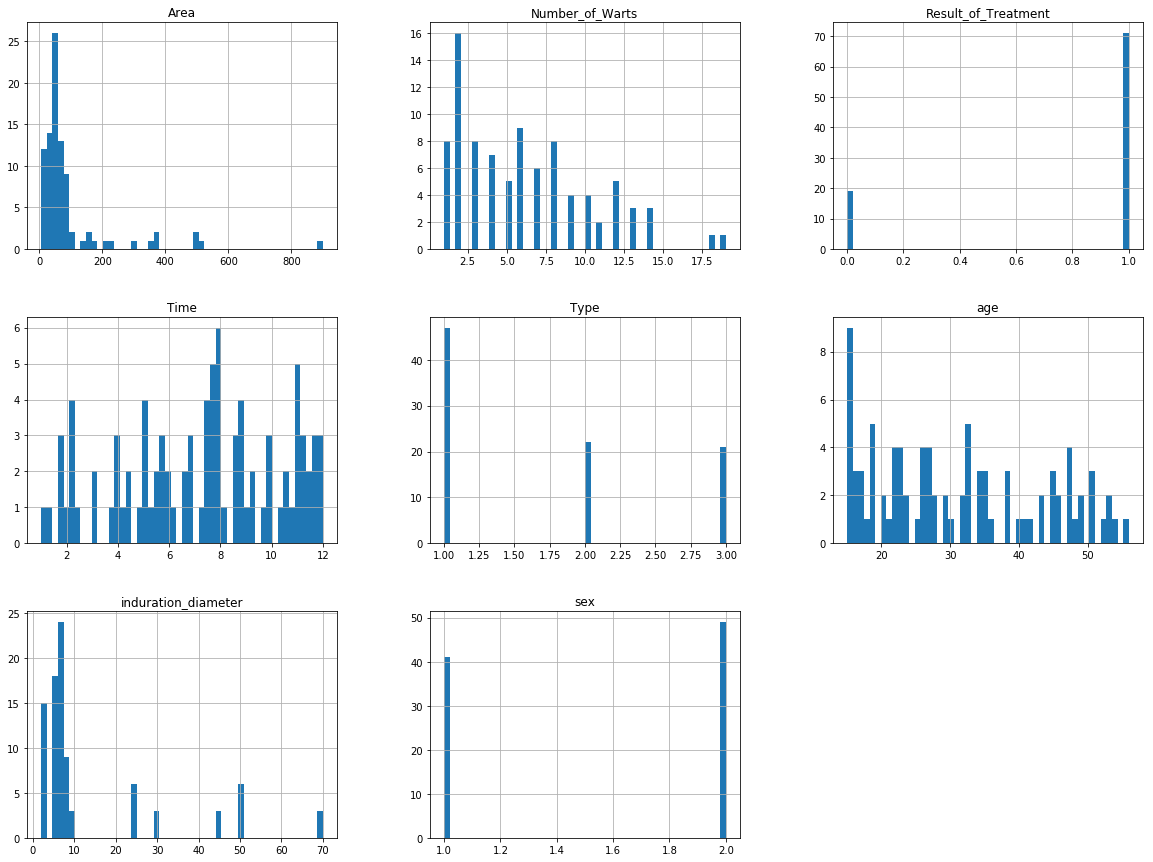

In [44]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn import preprocessing
import pandas as pd
import itertools

header = ["sex","age","time","number of warts", "type", "area",
          "induration", "result of treatment"]
immun_raw = pd.read_csv("./Immunotherapy/Immunotherapy.csv", sep = ";", header = 0)
print(immun_raw)
immun = immun_raw.values
print(immun)
#class_names = ["Worked","Did not work"]
#adults_raw['education'].value_counts().plot(title = 'Education', kind='bar')
#plt.show()
#adults_raw['marital-status'].value_counts().plot(title = 'Marital-Status', kind='bar')
#plt.show()
immun_raw.hist(bins = 50, figsize = (20,15))
plt.show()
#for item in header:
#    adults_raw[item].value_counts().plot(title = item, kind='bar')
#    plt.show()

KFold 1
 Split:
 Train:  [ 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32
 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56
 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80
 81 82 83 84 85 86 87 88 89] 
 Test:  [0 1 2 3 4 5 6 7 8]
 Score = 0.89
[[0 0]
 [1 8]]
 Accuracy:	 0.889
 Precision:	 1.000
 Sensitivity:	 0.889
 F1:		 0.941
KFold 2
 Split:
 Train:  [ 0  1  2  3  4  5  6  7  8 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32
 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56
 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80
 81 82 83 84 85 86 87 88 89] 
 Test:  [ 9 10 11 12 13 14 15 16 17]
 Score = 0.78
[[1 1]
 [1 6]]
 Accuracy:	 0.778
 Precision:	 0.857
 Sensitivity:	 0.857
 F1:		 0.857
KFold 3
 Split:
 Train:  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 27 28 29 30 31 32
 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56
 57 58 59 60 61 

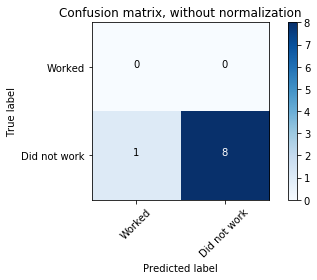

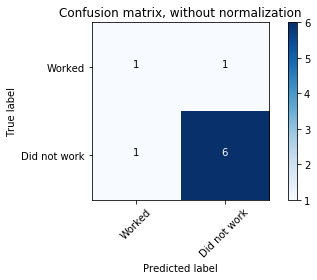

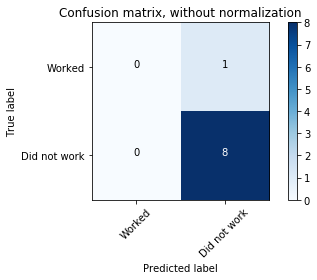

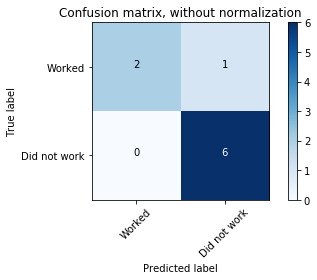

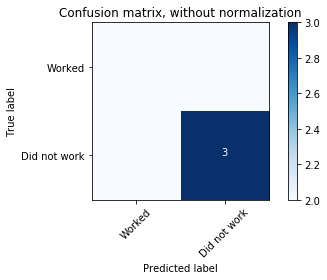

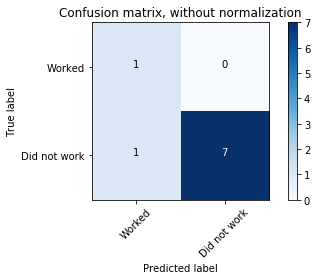

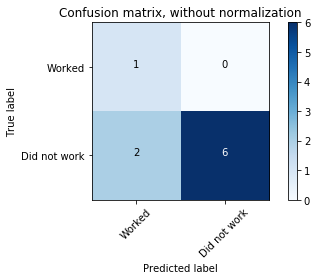

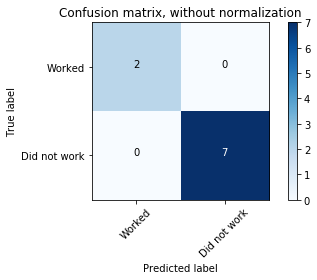

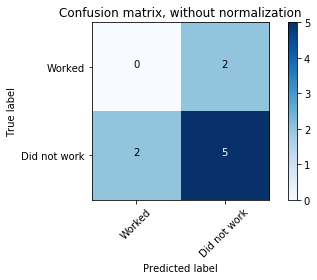

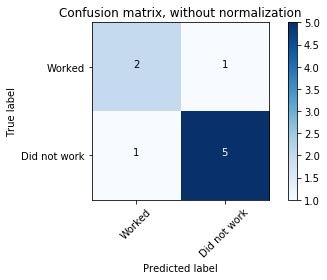

In [49]:
from sklearn.model_selection import KFold
from sklearn import metrics as m

splits = 10
kf = KFold(n_splits = splits)
i = 0
ac_total = 0;
pr_total = 0;
re_total = 0;
f1_total = 0;
for train, test in kf.split(immun):
    i += 1
    X_train, X_test = immun[train], immun[test]
    y_train, y_test = immun[train], immun[test]
    
    immun_input = X_train[:,0:7]
    #print(immun_input)
    immun_target = X_train[:,7]
    #print(immun_target)
    
    clf = tree.DecisionTreeClassifier()
    clf.fit(immun_input, immun_target)
    
    immun_input_test = X_test[:,0:7]
    #print(immun_input)
    immun_target_test = X_test[:,7]
    #print(immun_target)
    
    
    print("KFold", i)
    print(" Split:\n", "Train: ", train,"\n Test: ", test)
    print(" Score = %.2f" % clf.score(immun_input_test, immun_target_test))
    


    prediction = clf.predict(immun_input_test)
    cnf_matrix = m.confusion_matrix(immun_target_test, prediction)
    
    np.set_printoptions(precision=2)

    # Plot non-normalized confusion matrix
    plt.figure()
    plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')
    
    ac = m.accuracy_score(immun_target_test, prediction)
    pr = m.precision_score(immun_target_test, prediction)
    re = m.recall_score(immun_target_test, prediction)
    f1 = m.f1_score(immun_target_test, prediction)
    
    ac_total += ac;
    pr_total += pr;
    re_total += re;
    f1_total += f1;

    print(" Accuracy:\t %.3f" % m.accuracy_score(immun_target_test, prediction))
    print(" Precision:\t %.3f" % m.precision_score(immun_target_test, prediction))
    print(" Sensitivity:\t %.3f" % m.recall_score(immun_target_test, prediction))
    print(" F1:\t\t %.3f" % m.f1_score(immun_target_test, prediction))
    
    

print("total")
print(" Accuracy:\t %.3f" % (ac_total/splits))
print(" Precision:\t %.3f" % (pr_total/splits))
print(" Sensitivity:\t %.3f" % (re_total/splits))
print(" F1:\t\t %.3f" % (f1_total/splits))

KFold 1
 Split:
 Train:  [18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41
 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65
 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89] 
 Test:  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17]
 Score = 0.94
Confusion matrix, without normalization
[[ 1  1]
 [ 0 16]]
 Accuracy:	 0.944
 Precision:	 0.941
 Sensitivity:	 1.000
 F1:		 0.970
KFold 2
 Split:
 Train:  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 36 37 38 39 40 41
 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65
 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89] 
 Test:  [18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35]
 Score = 0.83
Confusion matrix, without normalization
[[ 1  3]
 [ 0 14]]
 Accuracy:	 0.833
 Precision:	 0.824
 Sensitivity:	 1.000
 F1:		 0.903
KFold 3
 Split:
 Train:  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 

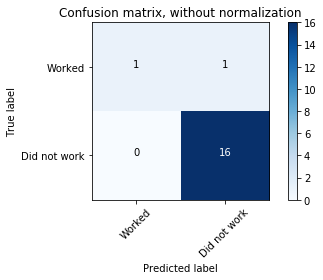

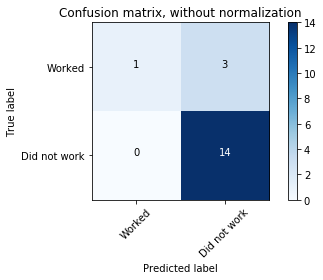

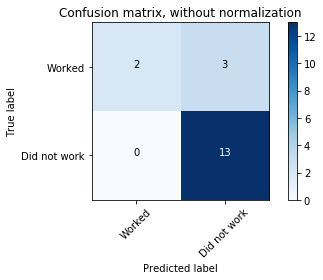

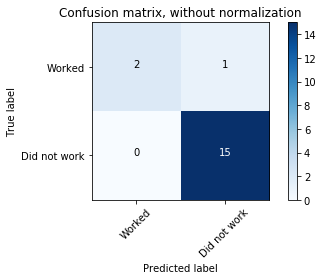

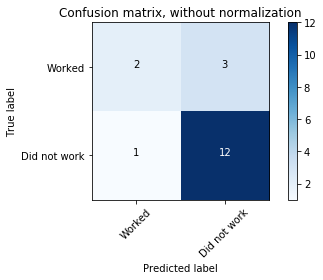

In [37]:
from sklearn.model_selection import KFold
from sklearn import metrics as m

splits = 5
kf = KFold(n_splits = splits)
i = 0
ac_total = 0;
pr_total = 0;
re_total = 0;
f1_total = 0;
for train, test in kf.split(immun):
    i += 1
    X_train, X_test = immun[train], immun[test]
    y_train, y_test = immun[train], immun[test]
    
    immun_input = X_train[:,0:7]
    #print(immun_input)
    immun_target = X_train[:,7]
    #print(immun_target)
    rand_forest = RandomForestClassifier(n_estimators = 200)
    rand_forest.fit(immun_input, immun_target)
    
    immun_input_test = X_test[:,0:7]
    #print(immun_input)
    immun_target_test = X_test[:,7]
    #print(immun_target)
    
    print("KFold", i)
    print(" Split:\n", "Train: ", train,"\n Test: ", test)
    print(" Score = %.2f" % rand_forest.score(immun_input_test, immun_target_test))

    prediction = rand_forest.predict(immun_input_test)
    cnf_matrix = m.confusion_matrix(immun_target_test, prediction)
    
    np.set_printoptions(precision=2)

    # Plot non-normalized confusion matrix
    plt.figure()
    plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')
    
    ac = m.accuracy_score(immun_target_test, prediction)
    pr = m.precision_score(immun_target_test, prediction)
    re = m.recall_score(immun_target_test, prediction)
    f1 = m.f1_score(immun_target_test, prediction)
    
    ac_total += ac;
    pr_total += pr;
    re_total += re;
    f1_total += f1;

    print(" Accuracy:\t %.3f" % m.accuracy_score(immun_target_test, prediction))
    print(" Precision:\t %.3f" % m.precision_score(immun_target_test, prediction))
    print(" Sensitivity:\t %.3f" % m.recall_score(immun_target_test, prediction))
    print(" F1:\t\t %.3f" % m.f1_score(immun_target_test, prediction))
    
    

print("total")
print(" Accuracy:\t %.3f" % (ac_total/splits))
print(" Precision:\t %.3f" % (pr_total/splits))
print(" Sensitivity:\t %.3f" % (re_total/splits))
print(" F1:\t\t %.3f" % (f1_total/splits))

KFold 1
 Split:
 Train:  [18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41
 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65
 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89] 
 Test:  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17]
 Score = 0.89
Confusion matrix, without normalization
[[ 0  2]
 [ 0 16]]
 Accuracy:	 0.889
 Precision:	 0.889
 Sensitivity:	 1.000
 F1:		 0.941
KFold 2
 Split:
 Train:  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 36 37 38 39 40 41
 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65
 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89] 
 Test:  [18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35]
 Score = 0.78
Confusion matrix, without normalization
[[ 1  3]
 [ 1 13]]
 Accuracy:	 0.778
 Precision:	 0.812
 Sensitivity:	 0.929
 F1:		 0.867
KFold 3
 Split:
 Train:  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 

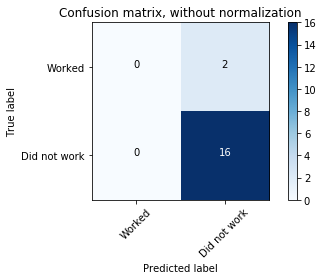

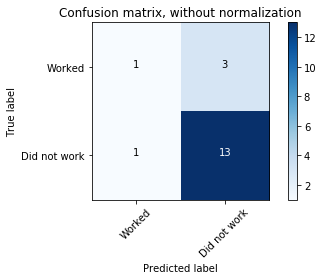

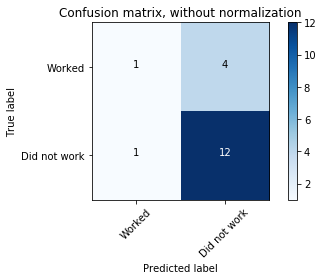

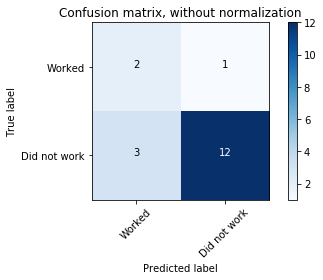

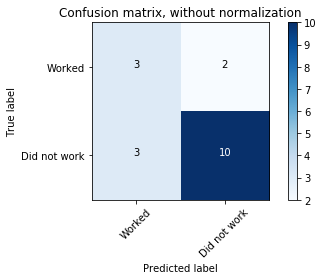

In [35]:
from sklearn.model_selection import KFold
from sklearn import metrics as m
from sklearn.naive_bayes import GaussianNB

splits = 5
kf = KFold(n_splits = splits)
i = 0
ac_total = 0;
pr_total = 0;
re_total = 0;
f1_total = 0;
for train, test in kf.split(immun):
    i += 1
    X_train, X_test = immun[train], immun[test]
    y_train, y_test = immun[train], immun[test]
    
    immun_input = X_train[:,0:7]
    #print(immun_input)
    immun_target = X_train[:,7]
    #print(immun_target)
    gnb = GaussianNB()
    gnb.fit(immun_input,immun_target)
    
    immun_input_test = X_test[:,0:7]
    #print(immun_input)
    immun_target_test = X_test[:,7]
    #print(immun_target)
    
    print("KFold", i)
    print(" Split:\n", "Train: ", train,"\n Test: ", test)
    print(" Score = %.2f" % gnb.score(immun_input_test, immun_target_test))
    


    prediction = gnb.predict(immun_input_test)
    cnf_matrix = m.confusion_matrix(immun_target_test, prediction)
    
    np.set_printoptions(precision=2)

    # Plot non-normalized confusion matrix
    plt.figure()
    plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')
    
    ac = m.accuracy_score(immun_target_test, prediction)
    pr = m.precision_score(immun_target_test, prediction)
    re = m.recall_score(immun_target_test, prediction)
    f1 = m.f1_score(immun_target_test, prediction)
    
    ac_total += ac;
    pr_total += pr;
    re_total += re;
    f1_total += f1;

    print(" Accuracy:\t %.3f" % m.accuracy_score(immun_target_test, prediction))
    print(" Precision:\t %.3f" % m.precision_score(immun_target_test, prediction))
    print(" Sensitivity:\t %.3f" % m.recall_score(immun_target_test, prediction))
    print(" F1:\t\t %.3f" % m.f1_score(immun_target_test, prediction))
    
    

print("total")
print(" Accuracy:\t %.3f" % (ac_total/splits))
print(" Precision:\t %.3f" % (pr_total/splits))
print(" Sensitivity:\t %.3f" % (re_total/splits))
print(" F1:\t\t %.3f" % (f1_total/splits))

KFold 1
 Split:
 Train:  [18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41
 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65
 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89] 
 Test:  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17]
 Score = 0.89
Confusion matrix, without normalization
[[ 0  2]
 [ 0 16]]
 Accuracy:	 0.889
 Precision:	 0.889
 Sensitivity:	 1.000
 F1:		 0.941
KFold 2
 Split:
 Train:  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 36 37 38 39 40 41
 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65
 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89] 
 Test:  [18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35]
 Score = 0.78
Confusion matrix, without normalization
[[ 0  4]
 [ 0 14]]
 Accuracy:	 0.778
 Precision:	 0.778
 Sensitivity:	 1.000
 F1:		 0.875
KFold 3
 Split:
 Train:  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 

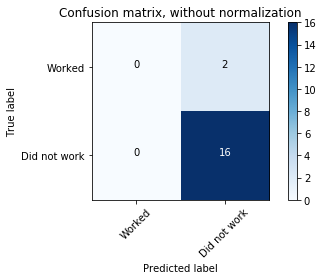

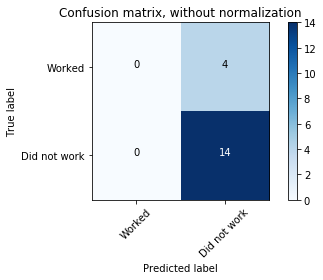

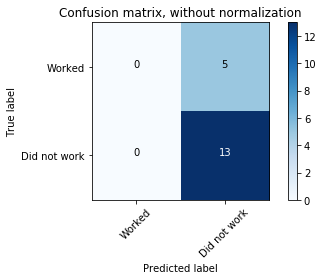

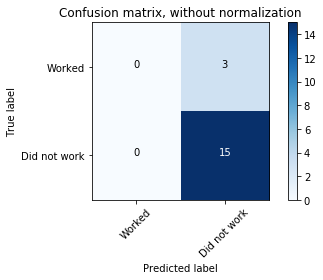

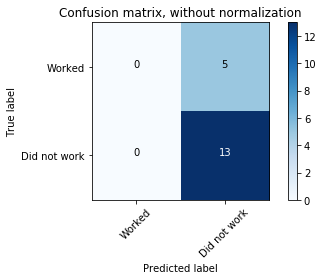

In [42]:
from sklearn.model_selection import KFold
from sklearn import metrics as m
from sklearn.svm import SVC

splits = 5
kf = KFold(n_splits = splits)
i = 0
ac_total = 0;
pr_total = 0;
re_total = 0;
f1_total = 0;
for train, test in kf.split(immun):
    i += 1
    X_train, X_test = immun[train], immun[test]
    y_train, y_test = immun[train], immun[test]
    
    immun_input = X_train[:,0:7]
    #print(immun_input)
    immun_target = X_train[:,7]
    #print(immun_target)

    svcl = SVC(gamma='auto', degree = 4)
    svcl.fit(immun_input,immun_target)
    

    
    immun_input_test = X_test[:,0:7]
    #print(immun_input)
    immun_target_test = X_test[:,7]
    #print(immun_target)
    
    print("KFold", i)
    print(" Split:\n", "Train: ", train,"\n Test: ", test)
    print(" Score = %.2f" % svcl.score(immun_input_test, immun_target_test))
    


    prediction = svcl.predict(immun_input_test)
    cnf_matrix = m.confusion_matrix(immun_target_test, prediction)
    
    np.set_printoptions(precision=2)

    # Plot non-normalized confusion matrix
    plt.figure()
    plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')
    
    ac = m.accuracy_score(immun_target_test, prediction)
    pr = m.precision_score(immun_target_test, prediction)
    re = m.recall_score(immun_target_test, prediction)
    f1 = m.f1_score(immun_target_test, prediction)
    
    ac_total += ac;
    pr_total += pr;
    re_total += re;
    f1_total += f1;

    print(" Accuracy:\t %.3f" % m.accuracy_score(immun_target_test, prediction))
    print(" Precision:\t %.3f" % m.precision_score(immun_target_test, prediction))
    print(" Sensitivity:\t %.3f" % m.recall_score(immun_target_test, prediction))
    print(" F1:\t\t %.3f" % m.f1_score(immun_target_test, prediction))
    
    

print("total")
print(" Accuracy:\t %.3f" % (ac_total/splits))
print(" Precision:\t %.3f" % (pr_total/splits))
print(" Sensitivity:\t %.3f" % (re_total/splits))
print(" F1:\t\t %.3f" % (f1_total/splits))

In [130]:
from sklearn.svm import SVC
svcl = SVC(gamma='scale')
svcl.fit(immun_input,immun_target)
svcl.score(immun_input_test,immun_target_test)
svcl_immun_test_predicted = svcl.predict(immun_input_test)
cnf_matrix = m.confusion_matrix(svcl_immun_test_predicted, immun_target_test)
print(cnf_matrix)
print(m.accuracy_score(immun_target_test, svcl_immun_test_predicted))
print(m.precision_score(immun_target_test, svcl_immun_test_predicted))
print(m.recall_score(immun_target_test, svcl_immun_test_predicted))
print(m.f1_score(immun_target_test, svcl_immun_test_predicted))

[[12205  3044]
 [  230   802]]
0.7989067010625883
0.7771317829457365
0.20852834113364535
0.3288232882328823
